In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib as mlb
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

import os

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


/kaggle/input/global-commodity-trade-statistics/commodity_trade_statistics_data.csv


**GLOBAL COMMODITY TRADE ANALYSIS USING DATA ANALYTICS , ML AND SIN CONCEPTS**

In [2]:
df = pd.read_csv('/kaggle/input/global-commodity-trade-statistics/commodity_trade_statistics_data.csv')
df.head()

/tmp/ipykernel_32/2119852813.py:1: DtypeWarning: Columns (2) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('/kaggle/input/global-commodity-trade-statistics/commodity_trade_statistics_data.csv')


,country_or_area,year,comm_code,commodity,flow,trade_usd,weight_kg,quantity_name,quantity,category
0,Afghanistan,2016,10410,"Sheep, live",Export,6088,2339.0,Number of items,51.0,01_live_animals
1,Afghanistan,2016,10420,"Goats, live",Export,3958,984.0,Number of items,53.0,01_live_animals
2,Afghanistan,2008,10210,"Bovine animals, live pure-bred breeding",Import,1026804,272.0,Number of items,3769.0,01_live_animals
3,Albania,2016,10290,"Bovine animals, live, except pure-bred breeding",Import,2414533,1114023.0,Number of items,6853.0,01_live_animals
4,Albania,2016,10392,"Swine, live except pure-bred breeding > 50 kg",Import,14265937,9484953.0,Number of items,96040.0,01_live_animals


In [3]:
df.isnull().sum()

country_or_area         0
year                    0
comm_code               0
commodity               0
flow                    0
trade_usd               0
weight_kg          128475
quantity_name           0
quantity           304857
category                0
dtype: int64

In [4]:
#getting rid of the unreliable data
df.rename(columns = {'country_or_area':'country'}, inplace = True)
df.drop(df[df['category'] == 'all_commodities'].index, inplace = True)
df.drop(df[df['category'] == '99_commodities_not_specified_according_to_kind'].index, inplace = True)
df.drop(df[df['country'] == 'EU-28'].index, inplace = True)

In [5]:
#converting the trade amount to simpler format for easier comparison and visibility
df['trade_usd']=(df['trade_usd']/1000000).round(2)
df.head(20)

,country,year,comm_code,commodity,flow,trade_usd,weight_kg,quantity_name,quantity,category
0,Afghanistan,2016,10410,"Sheep, live",Export,0.01,2339.0,Number of items,51.0,01_live_animals
1,Afghanistan,2016,10420,"Goats, live",Export,0.00,984.0,Number of items,53.0,01_live_animals
2,Afghanistan,2008,10210,"Bovine animals, live pure-bred breeding",Import,1.03,272.0,Number of items,3769.0,01_live_animals
3,Albania,2016,10290,"Bovine animals, live, except pure-bred breeding",Import,2.41,1114023.0,Number of items,6853.0,01_live_animals
4,Albania,2016,10392,"Swine, live except pure-bred breeding > 50 kg",Import,14.27,9484953.0,Number of items,96040.0,01_live_animals
5,Albania,2016,10511,"Fowls, live domestic < 185 grams",Import,2.67,254652.0,Number of items,5629138.0,01_live_animals
6,Albania,2016,10511,"Fowls, live domestic < 185 grams",Export,0.09,5320.0,Number of items,115180.0,01_live_animals
7,Albania,2016,10519,"Poultry, live except domestic fowls, < 185 grams",Import,0.03,2908.0,Number of items,64000.0,01_live_animals
8,Albania,2016,10591,"Fowls, live domestic > 185 grams",Import,2.42,1926850.0,Number of items,1006990.0,01_live_animals
9,Albania,2016,10599,"Poultry, live except domestic fowls, > 185 grams",Import,0.25,211177.0,Number of items,205124.0,01_live_animals


***Descriptive & Exploratory Analysis***

In [6]:
#getting the description of the dataset with respect to all aspects
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8139480 entries, 0 to 8209661
Data columns (total 10 columns):
 #   Column         Dtype  
---  ------         -----  
 0   country        object 
 1   year           int64  
 2   comm_code      object 
 3   commodity      object 
 4   flow           object 
 5   trade_usd      float64
 6   weight_kg      float64
 7   quantity_name  object 
 8   quantity       float64
 9   category       object 
dtypes: float64(3), int64(1), object(6)
memory usage: 683.1+ MB


In [7]:
df.describe(include='all', datetime_is_numeric=True)

,country,year,comm_code,commodity,flow,trade_usd,weight_kg,quantity_name,quantity,category
count,8139480,8.139480e+06,8139480.0,8139480,8139480,8.139480e+06,8.025617e+06,8139480,7.850630e+06,8139480
unique,206,NaN,5044.0,5029,4,NaN,NaN,12,NaN,96
top,Australia,NaN,210690.0,Food preparations nes,Import,NaN,NaN,Weight in kilograms,NaN,55_manmade_staple_fibres
freq,307453,NaN,8016.0,8016,4806471,NaN,NaN,6557988,NaN,100000
mean,NaN,2.004744e+03,NaN,NaN,NaN,1.865444e+01,3.222142e+07,NaN,2.646111e+08,NaN
std,NaN,7.051225e+00,NaN,NaN,NaN,4.435331e+02,2.343566e+09,NaN,3.755888e+11,NaN
min,NaN,1.988000e+03,NaN,NaN,NaN,0.000000e+00,0.000000e+00,NaN,0.000000e+00,NaN
25%,NaN,1.999000e+03,NaN,NaN,NaN,1.000000e-02,1.054000e+03,NaN,1.030000e+03,NaN
50%,NaN,2.005000e+03,NaN,NaN,NaN,1.500000e-01,2.577500e+04,NaN,2.600000e+04,NaN
75%,NaN,2.011000e+03,NaN,NaN,NaN,1.760000e+00,4.193760e+05,NaN,4.336570e+05,NaN


**Top trading countries based on the amount of trade in descending order**

In [8]:
df.shape[0]

8139480

/tmp/ipykernel_32/2252110819.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  ct=df.groupby('country', as_index=False).sum()


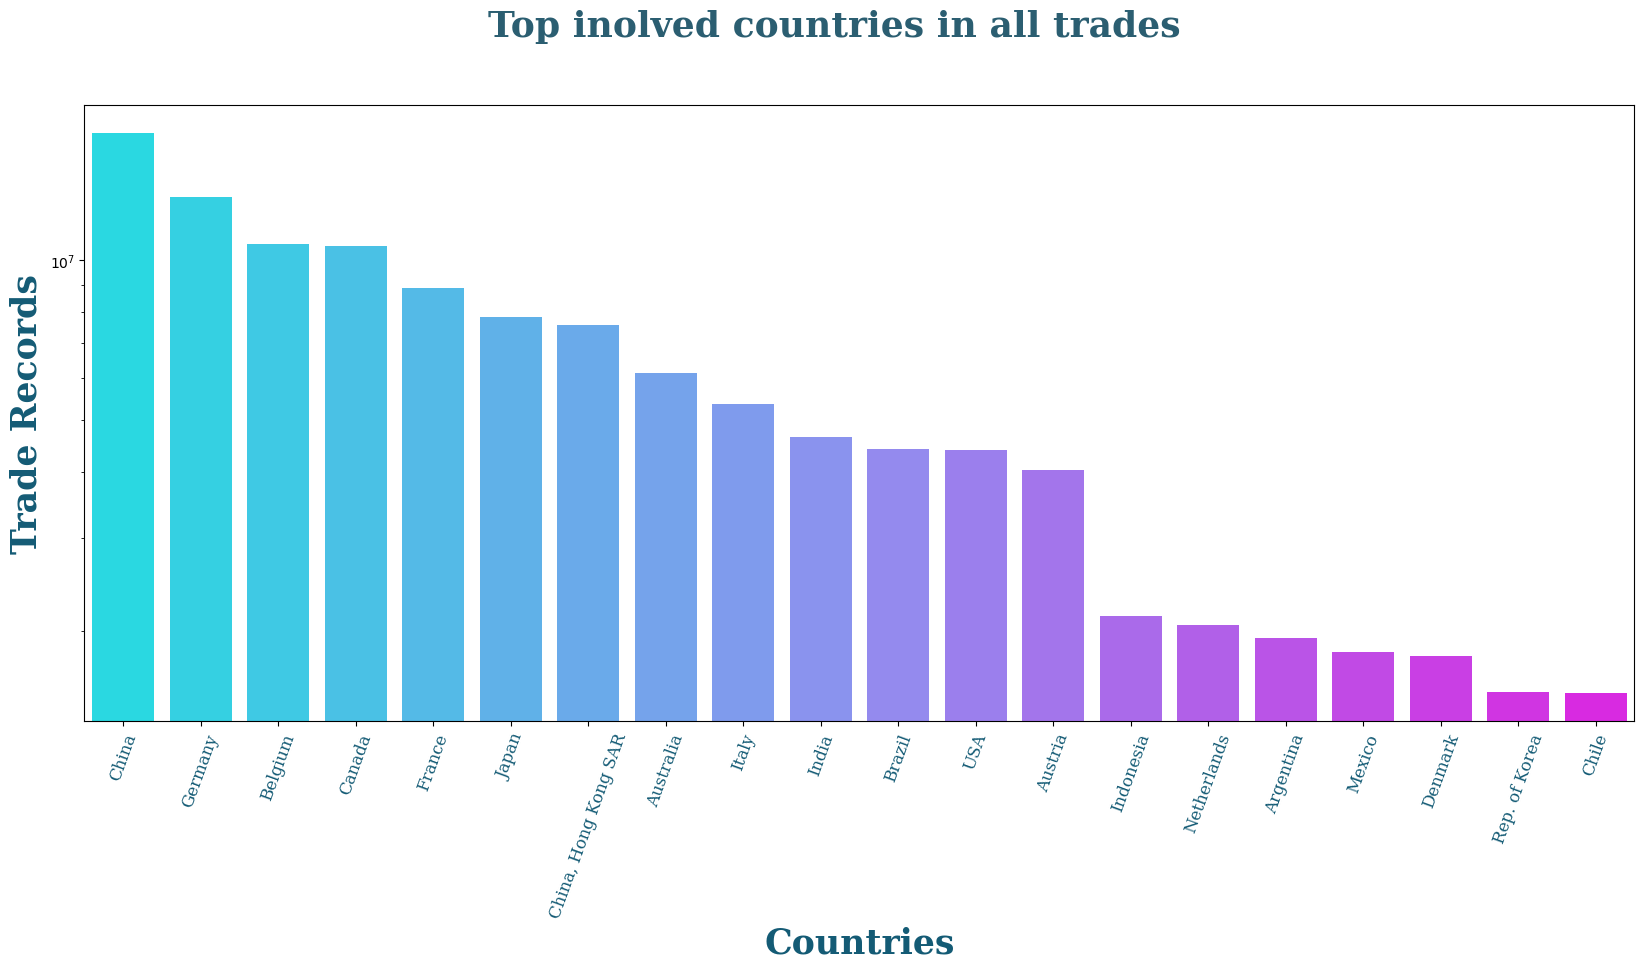

In [9]:
ct=df.groupby('country', as_index=False).sum()
#grouped by country and sorted based on the trading value
cts=ct.sort_values(by='trade_usd', ascending=False).head(20)

plt.subplots(figsize=(20, 8))
sns.barplot(data=cts, x='country', y='trade_usd', palette='cool')
plt.xticks(rotation=70, color='#145B75', ticks=None, fontfamily='Serif', fontsize=12)
plt.yticks([])
plt.yscale('log')

plt.xlabel('Countries', 
           fontsize=25,
          fontweight='bold',
          color='#145B75', fontfamily='serif')
plt.ylabel('Trade Records',
          fontsize=25,
           fontfamily='serif',
          fontweight='bold',
          color='#145B75')

plt.suptitle(
    "Top inolved countries in all trades",
    fontsize=26,
    fontfamily='serif',
    fontweight='bold',
    ha="center",
    y=1,
    color='#2B5E71')

plt.show()

**Analysing the Growth of the World considering trade as a measure**

/tmp/ipykernel_32/1678794109.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  cty=df.groupby('year', as_index=False).sum()


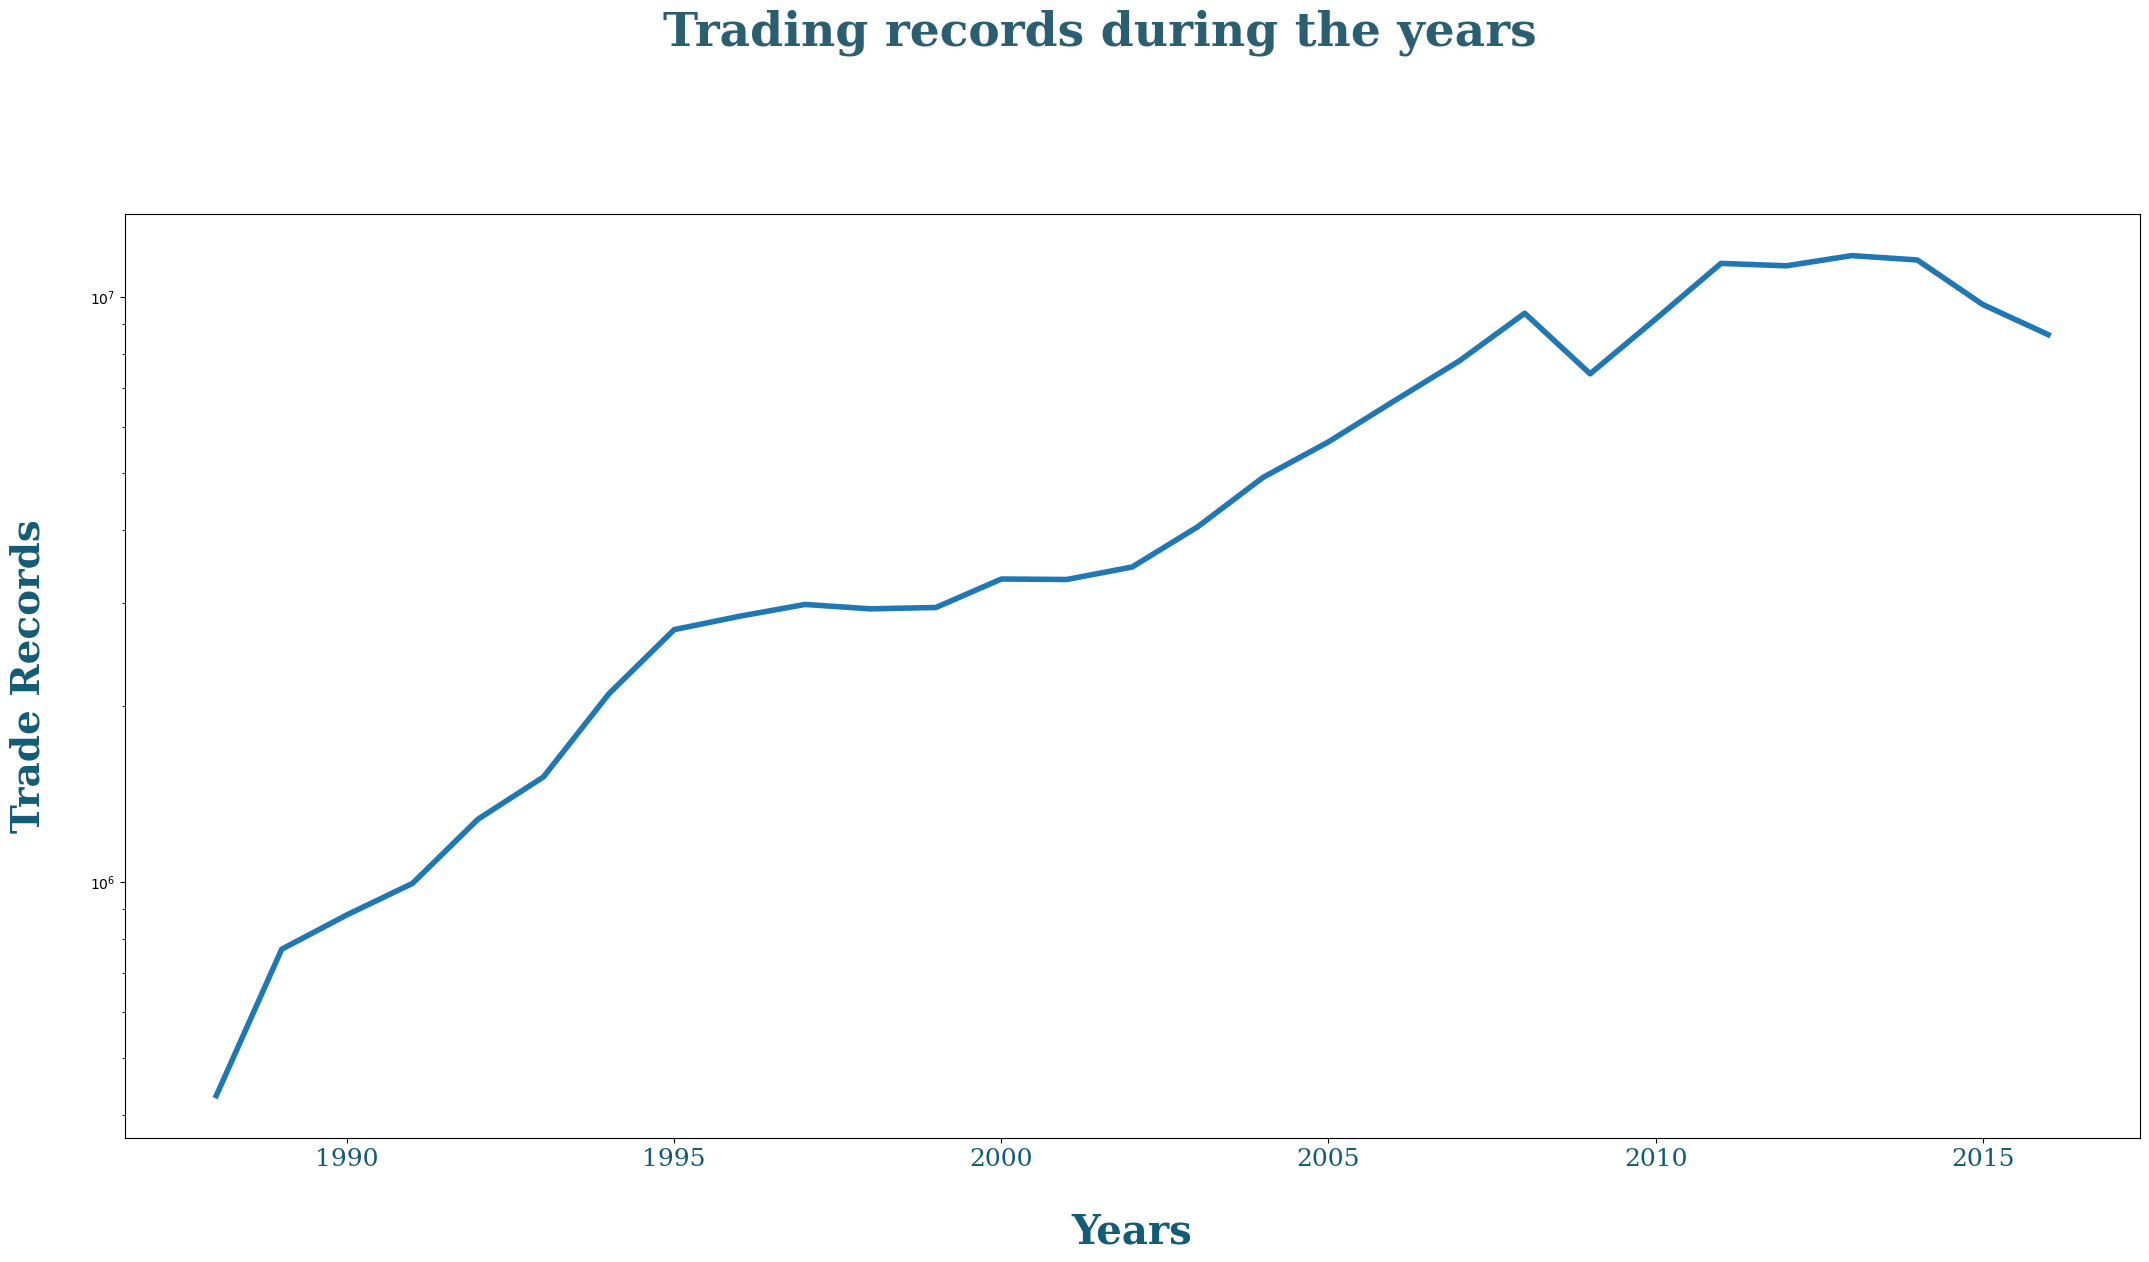

In [10]:
cty=df.groupby('year', as_index=False).sum()
#grouped by year and sorted based on the year
ctys=cty.sort_values(by='trade_usd', ascending=False)

plt.subplots(figsize=(26, 12))
sns.lineplot(data=ctys, x='year', y='trade_usd',linewidth=4)
plt.xticks(rotation=0, color='#145B75', ticks=None, fontfamily='Serif', fontsize=18)
plt.yticks([])
plt.yscale('log')

plt.xlabel('Years', 
           fontsize=29,
           fontfamily='Serif',
          fontweight='bold',
           labelpad=30,
          color='#145B75')
plt.ylabel('Trade Records',
          fontsize=28,
           fontfamily='Serif',
          fontweight='bold',
           labelpad=30,
          color='#145B75')

plt.suptitle(
    "Trading records during the years",
    fontsize=34,
    fontweight='bold',
    fontfamily='Serif',
    ha="center",
    y=1.05,
    color='#2B5E71')
#plt.grid(axis='y', color = 'gray', linestyle = '--', linewidth = 0.5, alpha=0.5)
plt.show()

**ANALYSING THE GROWTH OF THE COUNTRY INDIA OVER THE YEARS**

/tmp/ipykernel_32/2137323891.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  forecast = india_df.groupby('year',as_index=False).sum()


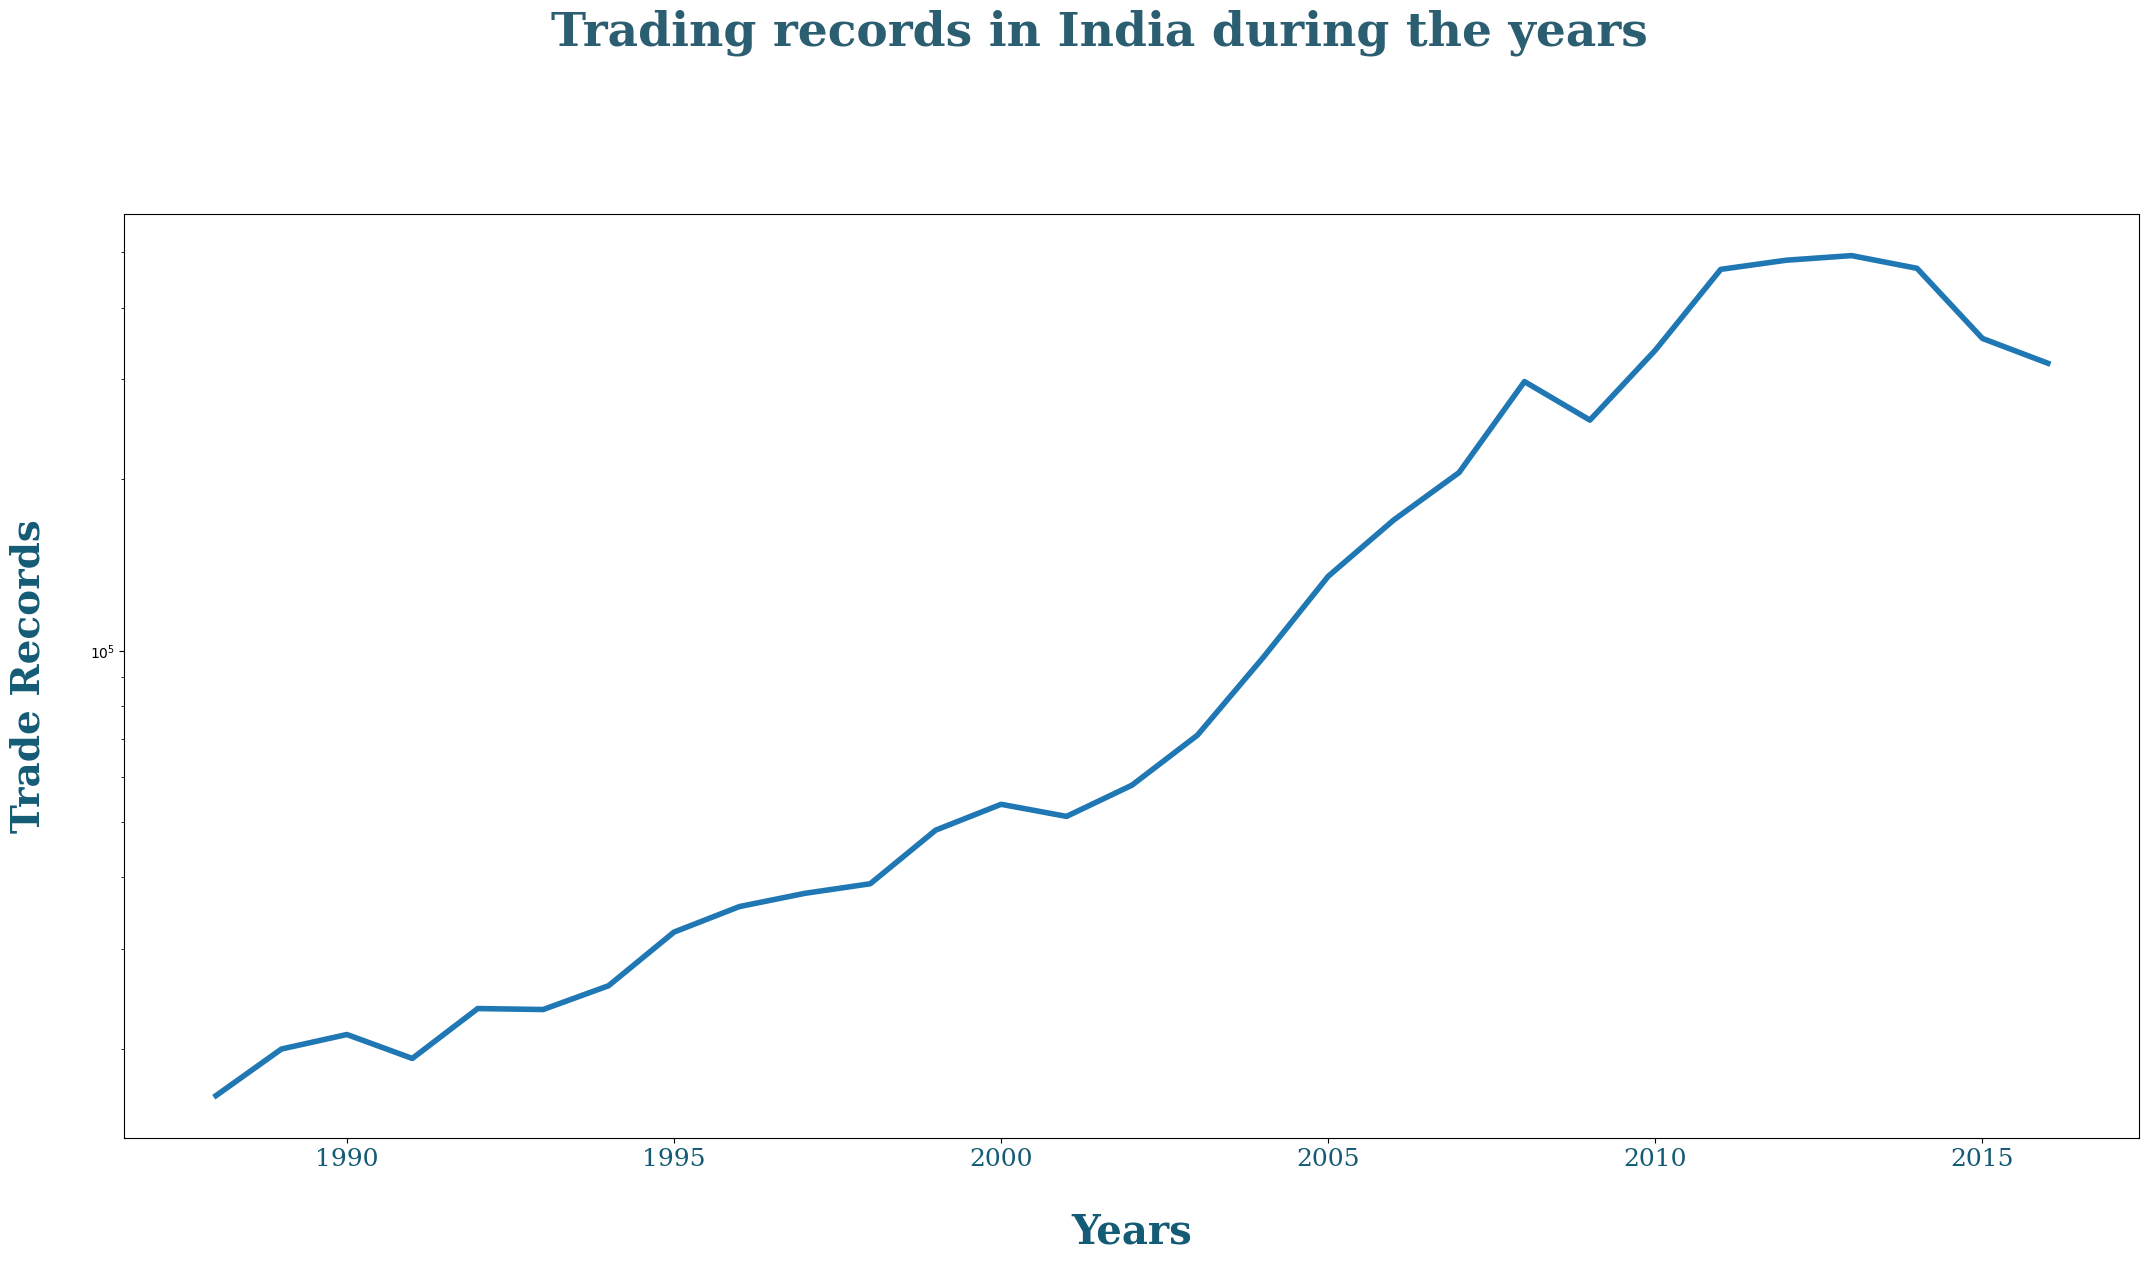

In [11]:
india_df = df[df['country'] == 'India']
forecast = india_df.groupby('year',as_index=False).sum()
forecast = forecast.sort_values(by = 'trade_usd', ascending = False)

plt.subplots(figsize=(26, 12))
sns.lineplot(data=forecast, x='year', y='trade_usd',linewidth=4)
plt.xticks(rotation=0, color='#145B75', ticks=None, fontfamily='Serif', fontsize=18)
plt.yticks([])
plt.yscale('log')

plt.xlabel('Years', 
           fontsize=29,
           fontfamily='Serif',
          fontweight='bold',
           labelpad=30,
          color='#145B75')
plt.ylabel('Trade Records',
          fontsize=28,
           fontfamily='Serif',
          fontweight='bold',
           labelpad=30,
          color='#145B75')

plt.suptitle(
    "Trading records in India during the years",
    fontsize=34,
    fontweight='bold',
    fontfamily='Serif',
    ha="center",
    y=1.05,
    color='#2B5E71')
#plt.grid(axis='y', color = 'gray', linestyle = '--', linewidth = 0.5, alpha=0.5)
plt.show()

In [12]:
print(pd.unique(df['category']))

['01_live_animals' '02_meat_and_edible_meat_offal'
 '03_fish_crustaceans_molluscs_aquatic_invertebrates_ne'
 '04_dairy_products_eggs_honey_edible_animal_product_nes'
 '05_products_of_animal_origin_nes'
 '06_live_trees_plants_bulbs_roots_cut_flowers_etc'
 '07_edible_vegetables_and_certain_roots_and_tubers'
 '08_edible_fruit_nuts_peel_of_citrus_fruit_melons'
 '09_coffee_tea_mate_and_spices' '10_cereals'
 '11_milling_products_malt_starches_inulin_wheat_glute'
 '12_oil_seed_oleagic_fruits_grain_seed_fruit_etc_ne'
 '13_lac_gums_resins_vegetable_saps_and_extracts_nes'
 '14_vegetable_plaiting_materials_vegetable_products_nes'
 '15_animal_vegetable_fats_and_oils_cleavage_products_et'
 '16_meat_fish_and_seafood_food_preparations_nes'
 '17_sugars_and_sugar_confectionery' '18_cocoa_and_cocoa_preparations'
 '19_cereal_flour_starch_milk_preparations_and_products'
 '20_vegetable_fruit_nut_etc_food_preparations'
 '21_miscellaneous_edible_preparations' '22_beverages_spirits_and_vinegar'
 '23_residues_

**List of Top traded commodities based on the trade value**

/tmp/ipykernel_32/2741317598.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  ctg=df.groupby('category', as_index=False).sum()


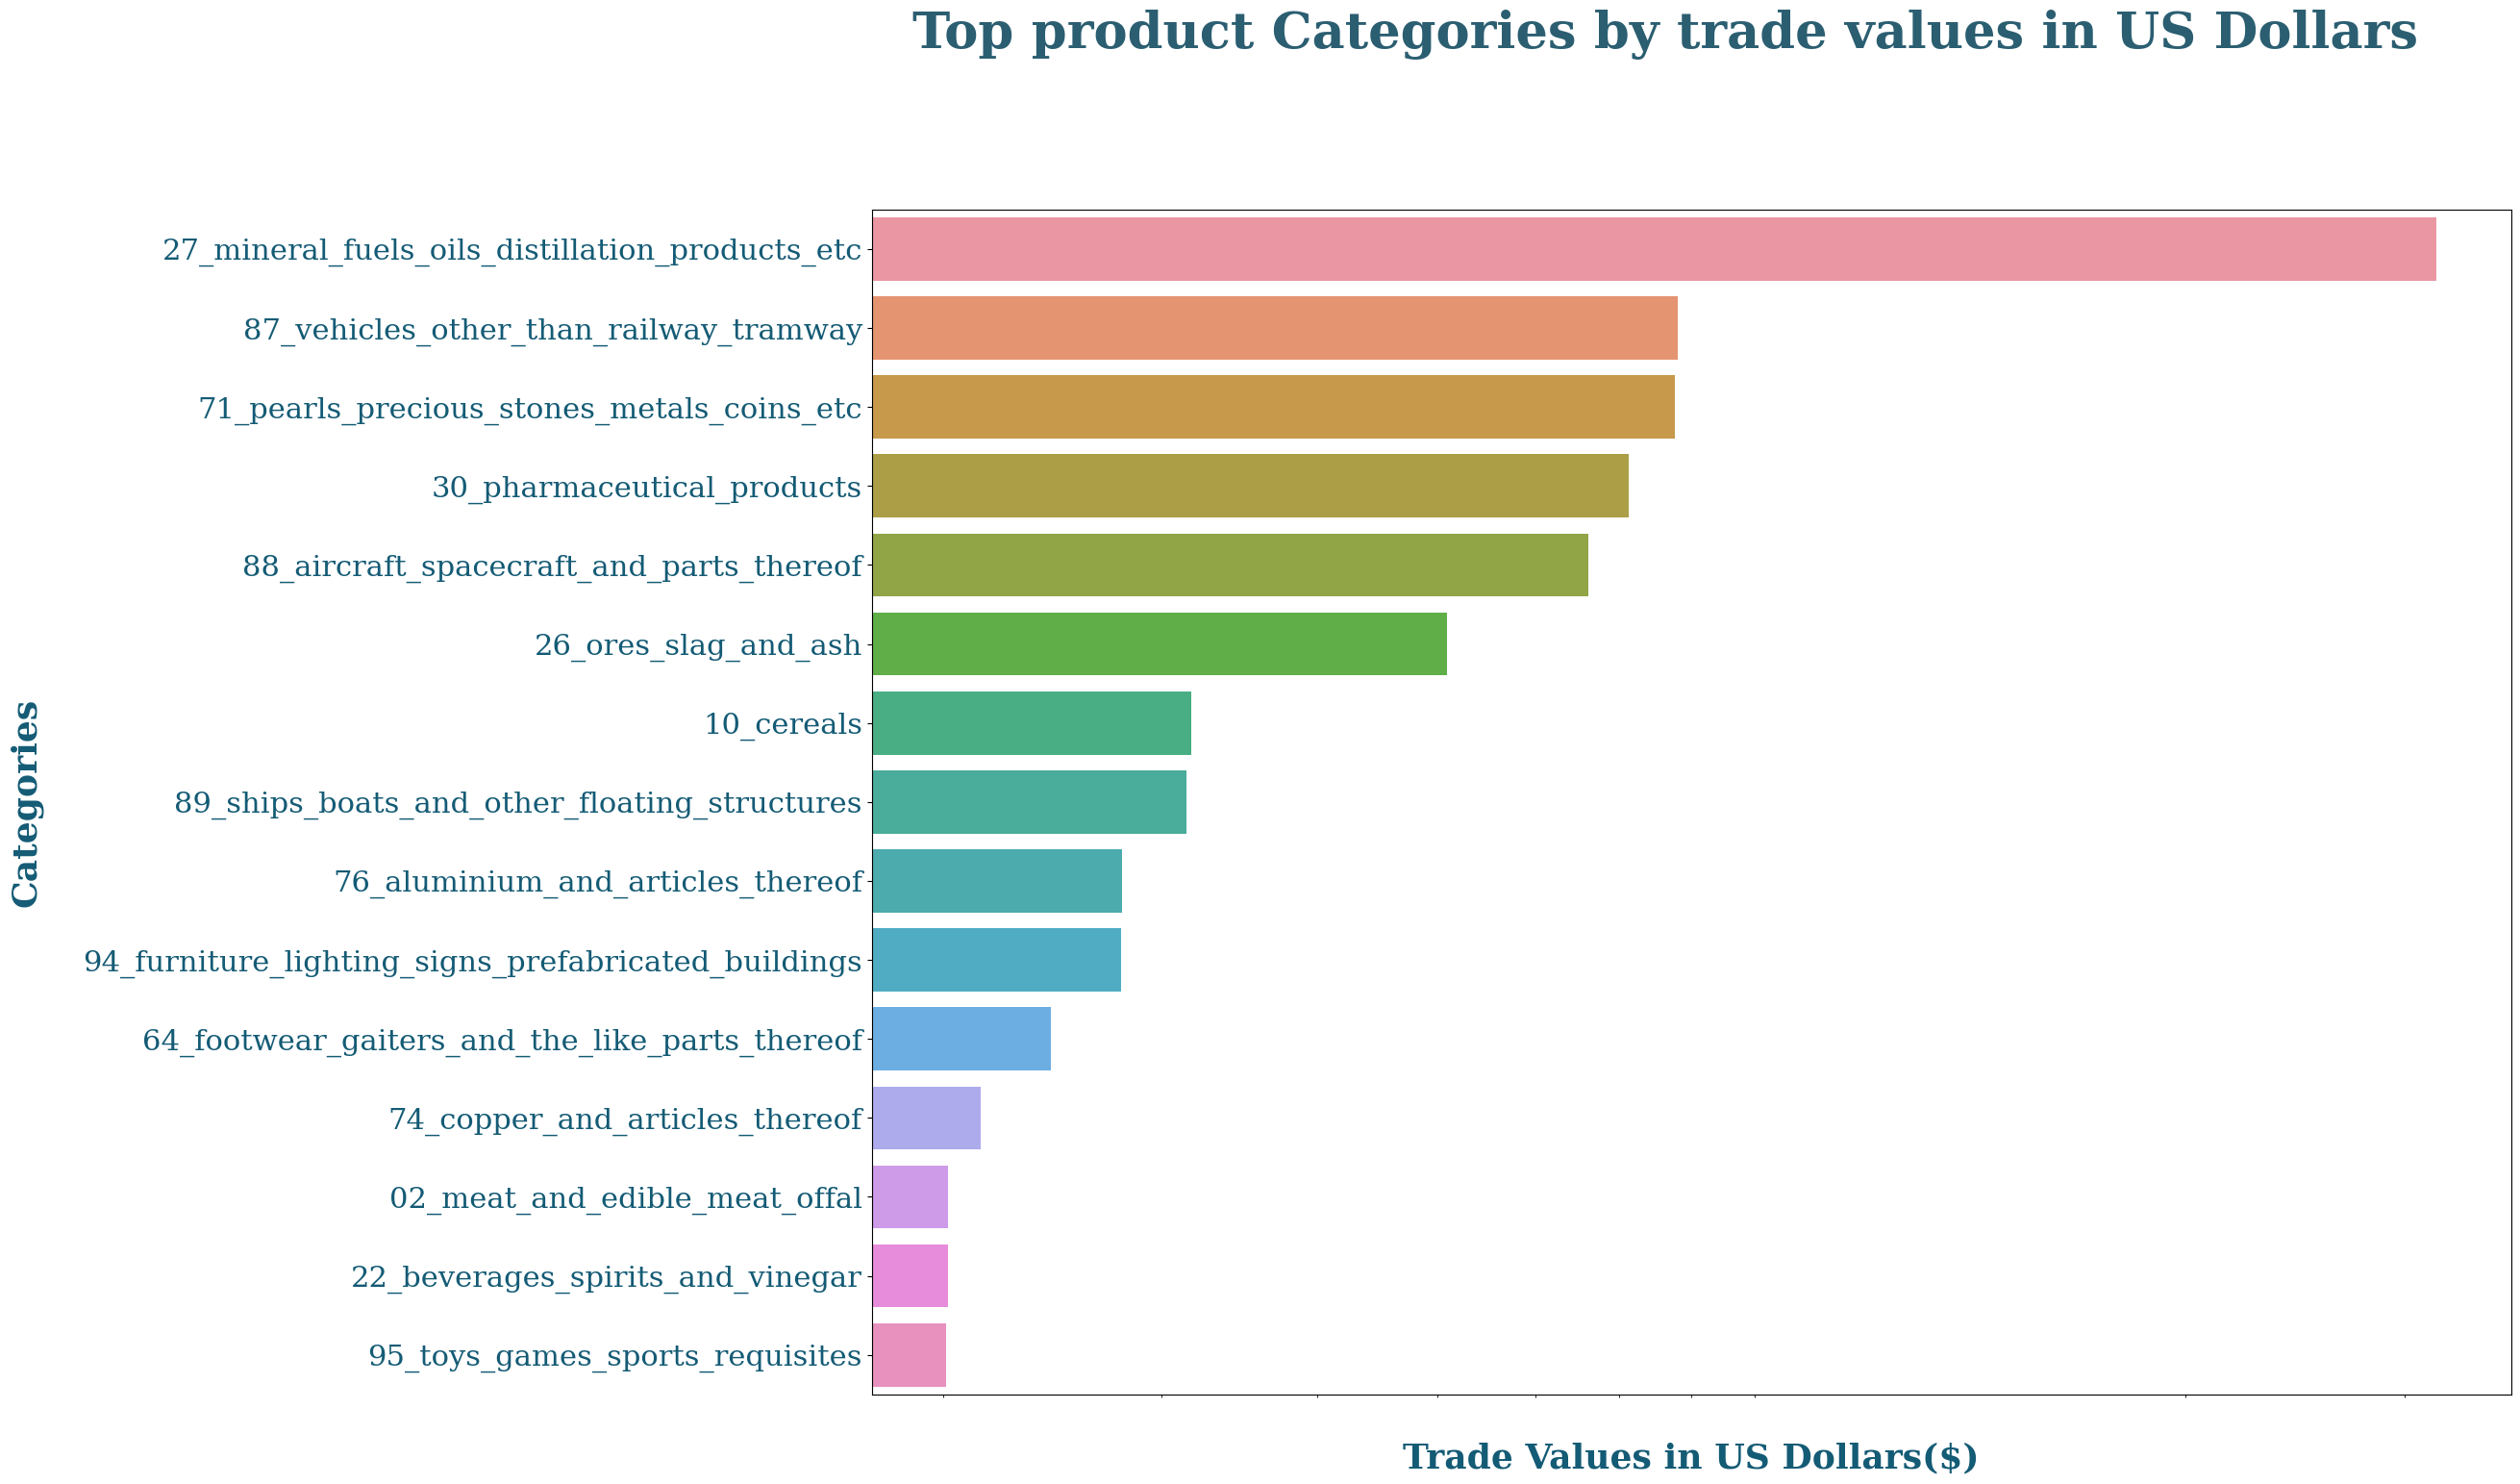

In [13]:
ctg=df.groupby('category', as_index=False).sum()
ctgv=ctg.sort_values(by='trade_usd', ascending=False).head(15)
ctgw=ctg.sort_values(by='weight_kg', ascending=False).head(15)
ctgq=ctg.sort_values(by='quantity', ascending=False).head(15)

plt.subplots(figsize=(22,16))
sns.barplot(data=ctgv, x='trade_usd', y='category')
plt.xscale('log')

plt.yticks(rotation=0, color='#145B75', ticks=None,fontfamily='Serif', fontsize=22)
plt.xticks([])

plt.xlabel('Trade Values in US Dollars($)', 
           fontsize=26,
           fontfamily='Serif',
          fontweight='bold',
           labelpad=30,
          color='#145B75')
plt.ylabel('Categories',
          fontsize=26,
           fontfamily='Serif',
          fontweight='bold',
           labelpad=30,
          color='#145B75')

plt.suptitle(
    "Top product Categories by trade values in US Dollars",
    fontsize=38,
    fontweight='bold',
    fontfamily='Serif',
    ha="center",
    y=1.01,
    color='#2B5E71')

plt.show()

In [14]:
# Now we will be trying to create a network using the minimal data given...
# We will be working only with top traded commodity and then the idea can be scaled to all the commodities
#commodities act as edges
# And we will also be working only with top trading countries

top_countries = list(cts['country'])
top_commodities = ctgv['category'].head(15)
top_comm_codes = []

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

# we need to analyze for the trades for a particular year instead of the whole dataset
# hence getting the subset of the dataset

tempyear_df = df[df['year']==2013]
df = tempyear_df

df['Category_Code'] = le.fit_transform(df['category']);

for i in top_commodities:
    top_comm_codes.append(df[df['category']==i]['Category_Code'].values[0])
    

print(top_countries)
print(top_commodities)
print(top_comm_codes)

top_countries_short = ['CHN','GER','BLG','CAN','FRA','JAP','HNK','AUS','ITY','IND','BRZ','USA','AUT','IDN','NLD','ARG','MEX','DEN','KOR','CHL']
# we have got the top_countries , top_comm_codes

# now we need to create edges : which needs info of country that export that commodity , import that commodity

#make a list of exporters of all the top_Commodities among the top_countries
def get_country_short(country):
    if country == 'China':
        return 'CHN';
    elif country == 'Germany':
        return 'GER';
    elif country == 'Belgium':
        return "BLG";
    elif country =="Canada":
        return "CAN";
    elif country =="France":
        return "FRA";
    elif country =="Japan":
        return "JAP";
    elif country =="China, Hong Kong SAR":
        return "HNK";
    elif country =="Australia":
        return "AUS";
    elif country =="Italy":
        return "ITY";
    elif country =="India":
        return "IND";
    elif country =="Brazil":
        return "BRZ";
    elif country =="USA":
        return "USA";
    elif country =="Austria":
        return "AUT";
    elif country =="Indonesia":
        return "IDN";
    elif country =="Netherlands":
        return "NLD";
    elif country =="Argentina":
        return "ARG";
    elif country =="Mexico":
        return "MEX";
    elif country =="Denmark":
        return "DEN";
    elif country =="Rep. of Korea":
        return "KOR";
    elif country =="Chile":
        return "CHL";
    else:
        return "";

#dataset for storing the top exporters
exports = {
    "mineral_fuels" : set(),
    "vehicles": set(),
    "precious_metals":set(),
    "pharmaceuticals":set(),
    "aircraft_spacecrafts":set(),
    "ores_slag":set(),
    "cereals":set(),
    "ship_boats":set(),
    "aluminium_articles":set(),
    "furnitures":set(),
    "footwear":set(),
    "copper_articles":set(),
    "meat":set(),
    "beverages":set(),
    "toys_sports_equip":set(),
}

def add_countries_to_exporter_list(comm_code,country):
        if comm_code == 26 and len(exports["mineral_fuels"]) <5:
            exports["mineral_fuels"].add(country); 
        elif comm_code == 85 and len(exports["vehicles"]) <5: 
            exports['vehicles'].add(country);
        elif comm_code == 70 and len(exports["precious_metals"]) <5: 
            exports['precious_metals'].add(country);
        elif comm_code == 29 and len(exports["pharmaceuticals"]) <5: 
            exports['pharmaceuticals'].add(country);
        elif comm_code == 86 and len(exports["aircraft_spacecrafts"]) <5: 
            exports["aircraft_spacecrafts"].add(country);
        elif comm_code == 25 and len(exports["ores_slag"]) <5: 
            exports['ores_slag'].add(country);
        elif comm_code == 9 and len(exports["cereals"]) <5: 
            exports['cereals'].add(country);
        elif comm_code == 87 and len(exports["ship_boats"]) <5: 
            exports['ship_boats'].add(country);
        elif comm_code == 75 and len(exports["aluminium_articles"]) <5: 
            exports["aluminium_articles"].add(country);
        elif comm_code == 92 and len(exports["furnitures"]) <5: 
            exports['furnitures'].add(country);
        elif comm_code == 63 and len(exports["footwear"]) <5: 
            exports['footwear'].add(country);
        elif comm_code == 73 and len(exports["copper_articles"]) <5: 
            exports['copper_articles'].add(country);
        elif comm_code == 1 and len(exports["meat"]) <5: 
            exports["meat"].add(country);
        elif comm_code == 21 and len(exports["beverages"]) <5: 
            exports['beverages'].add(country);
        elif comm_code == 93 and len(exports["toys_sports_equip"]) <5: 
            exports['toys_sports_equip'].add(country);
        else:
            pass
        return;

for comm in top_comm_codes:
    comm_df = df[df['Category_Code']==comm].sort_values(by='trade_usd',ascending = False).head(5000)
    comm_df  = comm_df[comm_df['flow'] == 'Export']
    for ind , row in comm_df.iterrows():
        if row['country'] in top_countries:
            add_countries_to_exporter_list(row['Category_Code'] , get_country_short(row['country']));        

['China', 'Germany', 'Belgium', 'Canada', 'France', 'Japan', 'China, Hong Kong SAR', 'Australia', 'Italy', 'India', 'Brazil', 'USA', 'Austria', 'Indonesia', 'Netherlands', 'Argentina', 'Mexico', 'Denmark', 'Rep. of Korea', 'Chile']
26      27_mineral_fuels_oils_distillation_products_etc
85               87_vehicles_other_than_railway_tramway
70           71_pearls_precious_stones_metals_coins_etc
29                           30_pharmaceutical_products
86             88_aircraft_spacecraft_and_parts_thereof
25                                 26_ores_slag_and_ash
9                                            10_cereals
87         89_ships_boats_and_other_floating_structures
75                    76_aluminium_and_articles_thereof
92    94_furniture_lighting_signs_prefabricated_buil...
63       64_footwear_gaiters_and_the_like_parts_thereof
73                       74_copper_and_articles_thereof
1                         02_meat_and_edible_meat_offal
21                     22_beverages_spir

In [15]:
# we have the top exporters of the commodity
display(exports)

{'mineral_fuels': {'AUS', 'BLG', 'CAN', 'IND', 'MEX'},
 'vehicles': {'ARG', 'BLG', 'BRZ', 'CAN', 'CHN'},
 'precious_metals': {'BLG', 'CAN', 'CHN', 'HNK', 'IND'},
 'pharmaceuticals': {'BLG', 'FRA', 'GER', 'IND', 'ITY'},
 'aircraft_spacecrafts': {'CAN', 'FRA', 'GER', 'JAP', 'USA'},
 'ores_slag': {'AUS', 'BRZ', 'CAN', 'CHL', 'IDN'},
 'cereals': {'AUS', 'BRZ', 'FRA', 'IND', 'USA'},
 'ship_boats': {'BRZ', 'CHN', 'GER', 'JAP', 'KOR'},
 'aluminium_articles': {'AUS', 'CAN', 'CHN', 'GER', 'ITY'},
 'furnitures': {'AUT', 'CAN', 'CHN', 'FRA', 'GER'},
 'footwear': {'BLG', 'CHN', 'GER', 'HNK', 'ITY'},
 'copper_articles': {'AUS', 'BLG', 'CHL', 'CHN', 'GER'},
 'meat': {'AUS', 'BRZ', 'DEN', 'GER', 'IND'},
 'beverages': {'BRZ', 'FRA', 'ITY', 'MEX', 'NLD'},
 'toys_sports_equip': {'BLG', 'CHN', 'DEN', 'GER', 'HNK'}}

In [16]:
# now we need to create edges.....
# we will go thru all the country df , then import , then sort based on trade_usd , then take the top 500 imports and check who is exporting them and make a link with them
import random;
def getcatname(cat_code):
    if cat_code == 26:
        return "mineral_fuels";
    elif cat_code == 85:
        return "vehicles";
    elif cat_code == 70:
        return "precious_metals";
    elif cat_code == 29:
        return "pharmaceuticals";
    elif cat_code == 86:
        return "aircraft_spacecrafts";
    elif cat_code == 25:
        return "ores_slag";
    elif cat_code == 9:
        return "cereals";
    elif cat_code == 87:
        return "ship_boats";
    elif cat_code == 75:
        return "aluminium_articles";
    elif cat_code == 92:
        return "furnitures";
    elif cat_code == 63:
        return "footwear";
    elif cat_code == 73:
        return "copper_articles";
    elif cat_code == 1:
        return "meat";
    elif cat_code == 21:
        return "beverages";
    elif cat_code == 93:
        return "toys_sports_equip";
    else:
        return "";

edges = []
for cont in top_countries:
    cont_df = df[df['country']==cont]
    cont_df_imports = cont_df[cont_df['flow']=='Import'].sort_values(by='trade_usd',ascending = False)
    for cat in top_comm_codes:
        #get the latest trade data and use it to create the edge
        cont_df_imports_cat = cont_df_imports[cont_df_imports['Category_Code']==cat].head(1)
        for ind , row in cont_df_imports_cat.iterrows():
                cat_name = getcatname(cat)
                exp = random.choice(list(exports[cat_name]))
                while exp == get_country_short(row['country']):
                    exp = random.choice(list(exports[cat_name]))

                if exp != get_country_short(row['country']):
                    edges.append([get_country_short(row['country']) , exp , row['trade_usd'] , row['Category_Code']])

display(edges)
        
# after having the edges we will plot them in the networkx library ggraph
# and then map it to the mapbox api


[['CHN', 'BLG', 219660.37, 26],
 ['CHN', 'CAN', 36289.11, 85],
 ['CHN', 'IND', 5679.91, 70],
 ['CHN', 'BLG', 6955.45, 29],
 ['CHN', 'FRA', 20010.55, 86],
 ['CHN', 'BRZ', 102080.39, 25],
 ['CHN', 'IND', 1390.37, 9],
 ['CHN', 'BRZ', 773.22, 87],
 ['CHN', 'CAN', 3915.96, 75],
 ['CHN', 'AUT', 1059.4, 92],
 ['CHN', 'ITY', 715.25, 63],
 ['CHN', 'CHL', 23583.06, 73],
 ['CHN', 'BRZ', 1496.46, 1],
 ['CHN', 'NLD', 1381.93, 21],
 ['CHN', 'DEN', 316.04, 93],
 ['GER', 'CAN', 75728.23, 26],
 ['GER', 'BLG', 4659.06, 70],
 ['GER', 'BLG', 21058.41, 29],
 ['GER', 'USA', 18056.09, 86],
 ['GER', 'AUS', 3314.78, 25],
 ['GER', 'IND', 1103.25, 9],
 ['GER', 'KOR', 3079.2, 87],
 ['GER', 'CHN', 4196.21, 75],
 ['GER', 'AUT', 4064.09, 92],
 ['GER', 'BLG', 2436.61, 63],
 ['GER', 'BLG', 4985.32, 73],
 ['GER', 'AUS', 1241.78, 1],
 ['GER', 'MEX', 2111.74, 21],
 ['GER', 'DEN', 2685.98, 93],
 ['BLG', 'IND', 36991.19, 26],
 ['BLG', 'CHN', 13476.21, 85],
 ['BLG', 'HNK', 13709.53, 70],
 ['BLG', 'IND', 21387.18, 29],
 ['BL

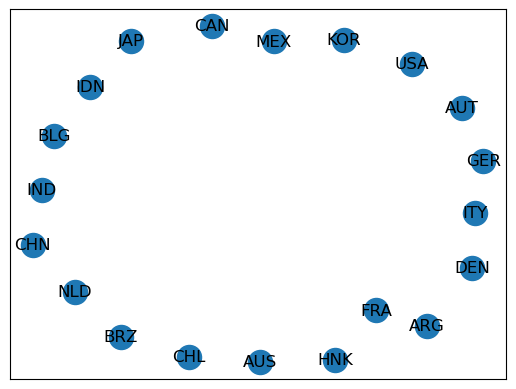

In [17]:
# now that we have created edges we will be using it to create a graph using networkx library
import networkx as nx
G = nx.Graph()

for node in top_countries_short:
    G.add_node(node)

nx.draw_networkx(G)
plt.show()


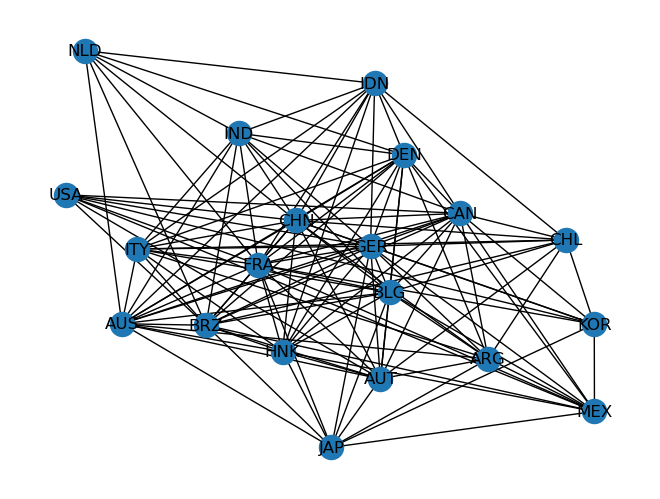

In [18]:
for edge in edges:
    G.add_edge(edge[0] , edge[1] , weight=edge[3])

pos = nx.spring_layout(G)

nx.draw(G,pos,with_labels=True)

plt.show()

In [19]:
# now we gotta plot the above map in the actual one using the mapbox api

#calculating the centralities

closeness_centrality = nx.closeness_centrality(G)
display(closeness_centrality)

{'CHN': 0.9047619047619048,
 'GER': 0.95,
 'BLG': 0.8260869565217391,
 'CAN': 0.8636363636363636,
 'FRA': 0.9047619047619048,
 'JAP': 0.6785714285714286,
 'HNK': 0.76,
 'AUS': 0.8260869565217391,
 'ITY': 0.7307692307692307,
 'IND': 0.7037037037037037,
 'BRZ': 0.8636363636363636,
 'USA': 0.6333333333333333,
 'AUT': 0.76,
 'IDN': 0.7037037037037037,
 'NLD': 0.6129032258064516,
 'ARG': 0.7037037037037037,
 'MEX': 0.7037037037037037,
 'DEN': 0.8260869565217391,
 'KOR': 0.6333333333333333,
 'CHL': 0.6785714285714286}

In [20]:
betweenness_centrality = nx.betweenness_centrality(G)
display(betweenness_centrality)

{'CHN': 0.0460228854965697,
 'GER': 0.04470013417381838,
 'BLG': 0.017908407382091592,
 'CAN': 0.03256795186619747,
 'FRA': 0.04714121161489582,
 'JAP': 0.008456536965308892,
 'HNK': 0.01092567276777803,
 'AUS': 0.022482553184307565,
 'ITY': 0.008589023062707273,
 'IND': 0.005084681400470874,
 'BRZ': 0.03685602896129212,
 'USA': 0.0027360066833751044,
 'AUT': 0.013840366910542348,
 'IDN': 0.01001810080757449,
 'NLD': 0.0005316321105794789,
 'ARG': 0.009695535134131624,
 'MEX': 0.012271630254086393,
 'DEN': 0.021930246491649995,
 'KOR': 0.006367771280051981,
 'CHL': 0.010294676084149768}

In [21]:
degree_centrality = nx.degree_centrality(G)
display(degree_centrality)

{'CHN': 0.894736842105263,
 'GER': 0.9473684210526315,
 'BLG': 0.7894736842105263,
 'CAN': 0.8421052631578947,
 'FRA': 0.894736842105263,
 'JAP': 0.5263157894736842,
 'HNK': 0.6842105263157894,
 'AUS': 0.7894736842105263,
 'ITY': 0.631578947368421,
 'IND': 0.5789473684210527,
 'BRZ': 0.8421052631578947,
 'USA': 0.42105263157894735,
 'AUT': 0.6842105263157894,
 'IDN': 0.5789473684210527,
 'NLD': 0.3684210526315789,
 'ARG': 0.5789473684210527,
 'MEX': 0.5789473684210527,
 'DEN': 0.7894736842105263,
 'KOR': 0.42105263157894735,
 'CHL': 0.5263157894736842}

/tmp/ipykernel_32/4020501834.py:15: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  nx.draw(G, pos, node_color=community_colors, cmap=plt.cm.get_cmap("viridis"), with_labels=True)


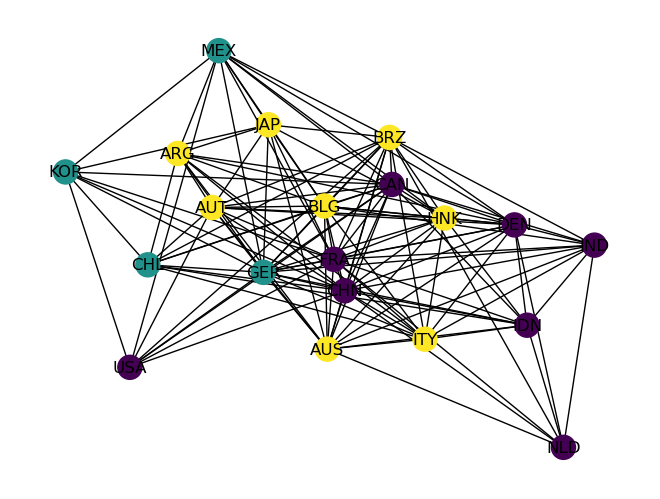

In [22]:
#community detection 

import community

# Detect communities using Louvain method
partition = community.best_partition(G , weight="weight")

import matplotlib.pyplot as plt

# Create a list of community colors
community_colors = [partition[node] for node in G.nodes()]

# Draw the graph with node colors based on communities
pos = nx.spring_layout(G)  # You can choose a layout algorithm that suits your graph
nx.draw(G, pos, node_color=community_colors, cmap=plt.cm.get_cmap("viridis"), with_labels=True)

# Display the graph
plt.show()